<a href="https://colab.research.google.com/github/runnily/forward-thinking/blob/main/forward_thinking_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward thinking VS Backpropgate

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [72]:
!ls

forward_thinking_results.ipynb	main.py  README.md  utils
LICENSE				models	 train.py


In [117]:
def plot(
    backpropgate, 
    forward_thinking, 
    forward_thinking_init_weights, 
    forward_thinking_batch_norm_init_weights, 
    forward_thinking_batch_norm_freeze_init_weights,
    ylim):
  fig, axs = plt.subplots(ncols=3, figsize=(55, 15))
  axs[0].set_title("Train Accuracy")
  axs[0].set_xlim([0,ylim])
  axs[0].grid()
  if isinstance(backpropgate, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="train_accuracy",  marker="o", data=backpropgate, ax=axs[0])
  if isinstance(forward_thinking, pd.DataFrame):
   sns.lineplot(x="time_elapsed", y="train_accuracy", marker="o", data=forward_thinking, ax=axs[0])
  if isinstance(forward_thinking_init_weights, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="train_accuracy", marker="o",data=forward_thinking_init_weights, ax=axs[0])
  if isinstance(forward_thinking_batch_norm_init_weights, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="train_accuracy", marker="o", data=forward_thinking_batch_norm_init_weights, ax=axs[0])
  if isinstance(forward_thinking_batch_norm_freeze_init_weights, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="train_accuracy", marker="o",data=forward_thinking_batch_norm_freeze_init_weights, ax=axs[0])

  axs[1].set_title("Test Accuracy")
  axs[1].set_xlim([0,ylim])
  axs[1].grid()
  if isinstance(backpropgate, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="test_accuracy",  marker="o", data=backpropgate, ax=axs[1])
  if isinstance(forward_thinking, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="test_accuracy", marker="o", data=forward_thinking, ax=axs[1])
  if isinstance(forward_thinking_init_weights, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="test_accuracy", marker="o",data=forward_thinking_init_weights, ax=axs[1])
  if isinstance(forward_thinking_batch_norm_init_weights, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="test_accuracy", marker="o", data=forward_thinking_batch_norm_init_weights, ax=axs[1])
  if isinstance(forward_thinking_batch_norm_freeze_init_weights, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="test_accuracy", marker="o",data=forward_thinking_batch_norm_freeze_init_weights, ax=axs[1])

  axs[2].set_title("Loss")
  axs[2].set_xlim([0,ylim])
  axs[2].grid()
  if isinstance(backpropgate, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="loss",  marker="o", data=backpropgate, ax=axs[2])
  if isinstance(forward_thinking, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="loss", marker="o", data=forward_thinking, ax=axs[2])
  if isinstance(forward_thinking_init_weights, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="loss", marker="o",data=forward_thinking_init_weights, ax=axs[2])
  if isinstance(forward_thinking_batch_norm_init_weights, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="loss", marker="o", data=forward_thinking_batch_norm_init_weights, ax=axs[2])
  if isinstance(forward_thinking_batch_norm_freeze_init_weights, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="loss", marker="o",data=forward_thinking_batch_norm_freeze_init_weights, ax=axs[2])
  axs[0].legend(labels=["backpropgate", "forward-thinking", "forward-thinking (IW)", "forward-thinking (IW|BN)", "forward-thinking (IW|BN-froozen)"])

# SVHN

This section is comparing the performance using different approachs: Forward thinking and backpropgation. 




In [74]:
backpropgate_svhn = pd.read_csv("utils/recorded-accuracy/SVHN-backpropgate.csv")
backpropgate_svhn.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,34.735309,1.378070,0.520248,0.871120
1,1,68.515266,0.368849,0.889979,0.910687
2,2,102.866000,0.278445,0.918795,0.929087
3,3,137.780043,0.229741,0.933726,0.931699
4,4,172.859223,0.197266,0.942922,0.935426


In [75]:
forward_thinking_svhn = pd.read_csv("utils/recorded-accuracy/SVHN-forward-thinking-pure.csv")
forward_thinking_svhn.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,11.451341,1.076465,0.669529,0.747349
1,1,22.804272,0.722132,0.790160,0.757145
2,2,34.185560,0.660732,0.808019,0.776122
3,3,45.660954,0.628389,0.817841,0.767171
4,4,57.162906,0.612164,0.823311,0.769591


In [76]:
forward_thinking_init_weights_svhn = pd.read_csv("/content/utils/recorded-accuracy/SVHN-forward-thinking-weights-init.csv")
forward_thinking_init_weights_svhn.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,11.083683,1.081840,0.664751,0.727681
1,1,22.407138,0.719810,0.789940,0.758374
2,2,33.665227,0.664669,0.808788,0.754994
3,3,44.859725,0.635263,0.815961,0.790604
4,4,55.997413,0.611533,0.822363,0.787915


In [77]:
forward_thinking_batch_norm_init_weights_svhn = pd.read_csv("utils/recorded-accuracy/SVHN-forward-thinking-weights-init-BN.csv")
forward_thinking_batch_norm_init_weights_svhn.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,11.740263,2.492371,0.280187,0.387523
1,1,23.455789,1.611657,0.472824,0.443416
2,2,35.168785,1.560776,0.495532,0.441188
3,3,46.694137,1.542617,0.502834,0.457207
4,4,57.950937,1.497086,0.518310,0.520859


In [78]:
forward_thinking_batch_norm_freeze_init_weights_svhn = pd.read_csv("utils/recorded-accuracy/SVHN-forward-thinking-weights-init-BN-freeze.csv")
forward_thinking_batch_norm_freeze_init_weights_svhn.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,11.433417,2.397103,0.334555,0.423517
1,1,22.705667,1.580537,0.488472,0.434734
2,2,34.228346,1.551182,0.498946,0.451675
3,3,45.606373,1.540007,0.503243,0.449216
4,4,56.823146,1.528608,0.509216,0.451905


In [79]:
matplotlib.rcParams.update({'font.size': 30})

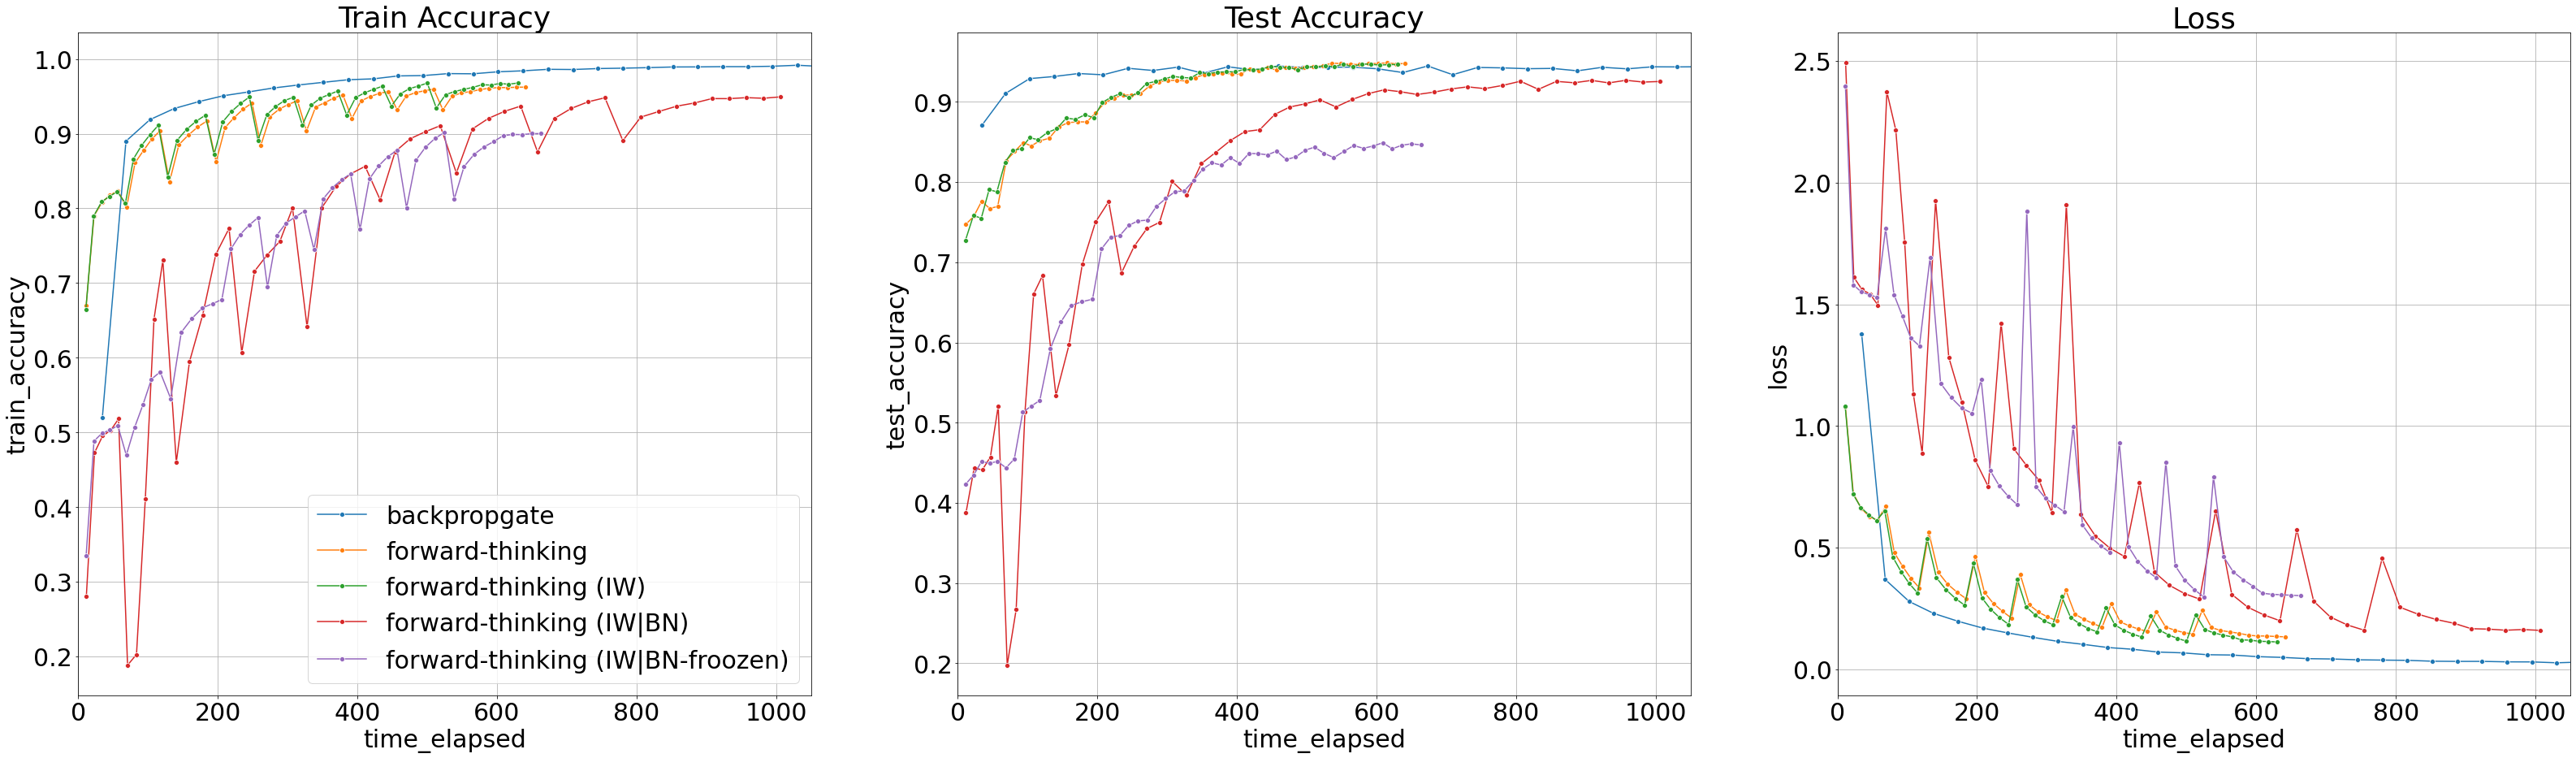

In [80]:
plot(backpropgate_svhn, 
    forward_thinking_svhn, 
    forward_thinking_init_weights_svhn, 
    forward_thinking_batch_norm_init_weights_svhn,
    forward_thinking_batch_norm_freeze_init_weights_svhn,
    ylim=1050)

# MNIST

In [92]:
backpropgate_mnist = pd.read_csv("utils/recorded-accuracy/MNIST-backpropgate.csv")
backpropgate_mnist.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,7.672883,0.508999,0.838886,0.9305
1,1,15.552711,0.181123,0.945129,0.9490
2,2,23.295990,0.131128,0.958805,0.9616
3,3,31.046604,0.104224,0.967767,0.9691
4,4,38.693230,0.087218,0.972715,0.9674


In [94]:
forward_thinking_mnist = pd.read_csv("utils/recorded-accuracy/MNIST-forward-thinking-pure.csv")
forward_thinking_mnist.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,7.386078,0.370156,0.891741,0.9411
1,1,14.778503,0.176990,0.948044,0.9563
2,2,22.141439,0.129309,0.962137,0.9592
3,3,29.541312,0.104727,0.968433,0.9695
4,4,37.013736,0.086126,0.973764,0.9698


In [95]:
forward_thinking_init_weights_mnist = pd.read_csv("/content/utils/recorded-accuracy/MNIST-forward-thinking-weights-init.csv")
forward_thinking_init_weights_mnist.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,7.200263,0.374129,0.889043,0.9383
1,1,14.592844,0.178565,0.947661,0.9534
2,2,22.009213,0.130649,0.960554,0.9646
3,3,29.195586,0.106631,0.968350,0.9666
4,4,36.415065,0.089035,0.972998,0.9711


In [98]:
forward_thinking_batch_norm_init_weights_mnist = None
forward_thinking_batch_norm_freeze_init_weights_mnist = None

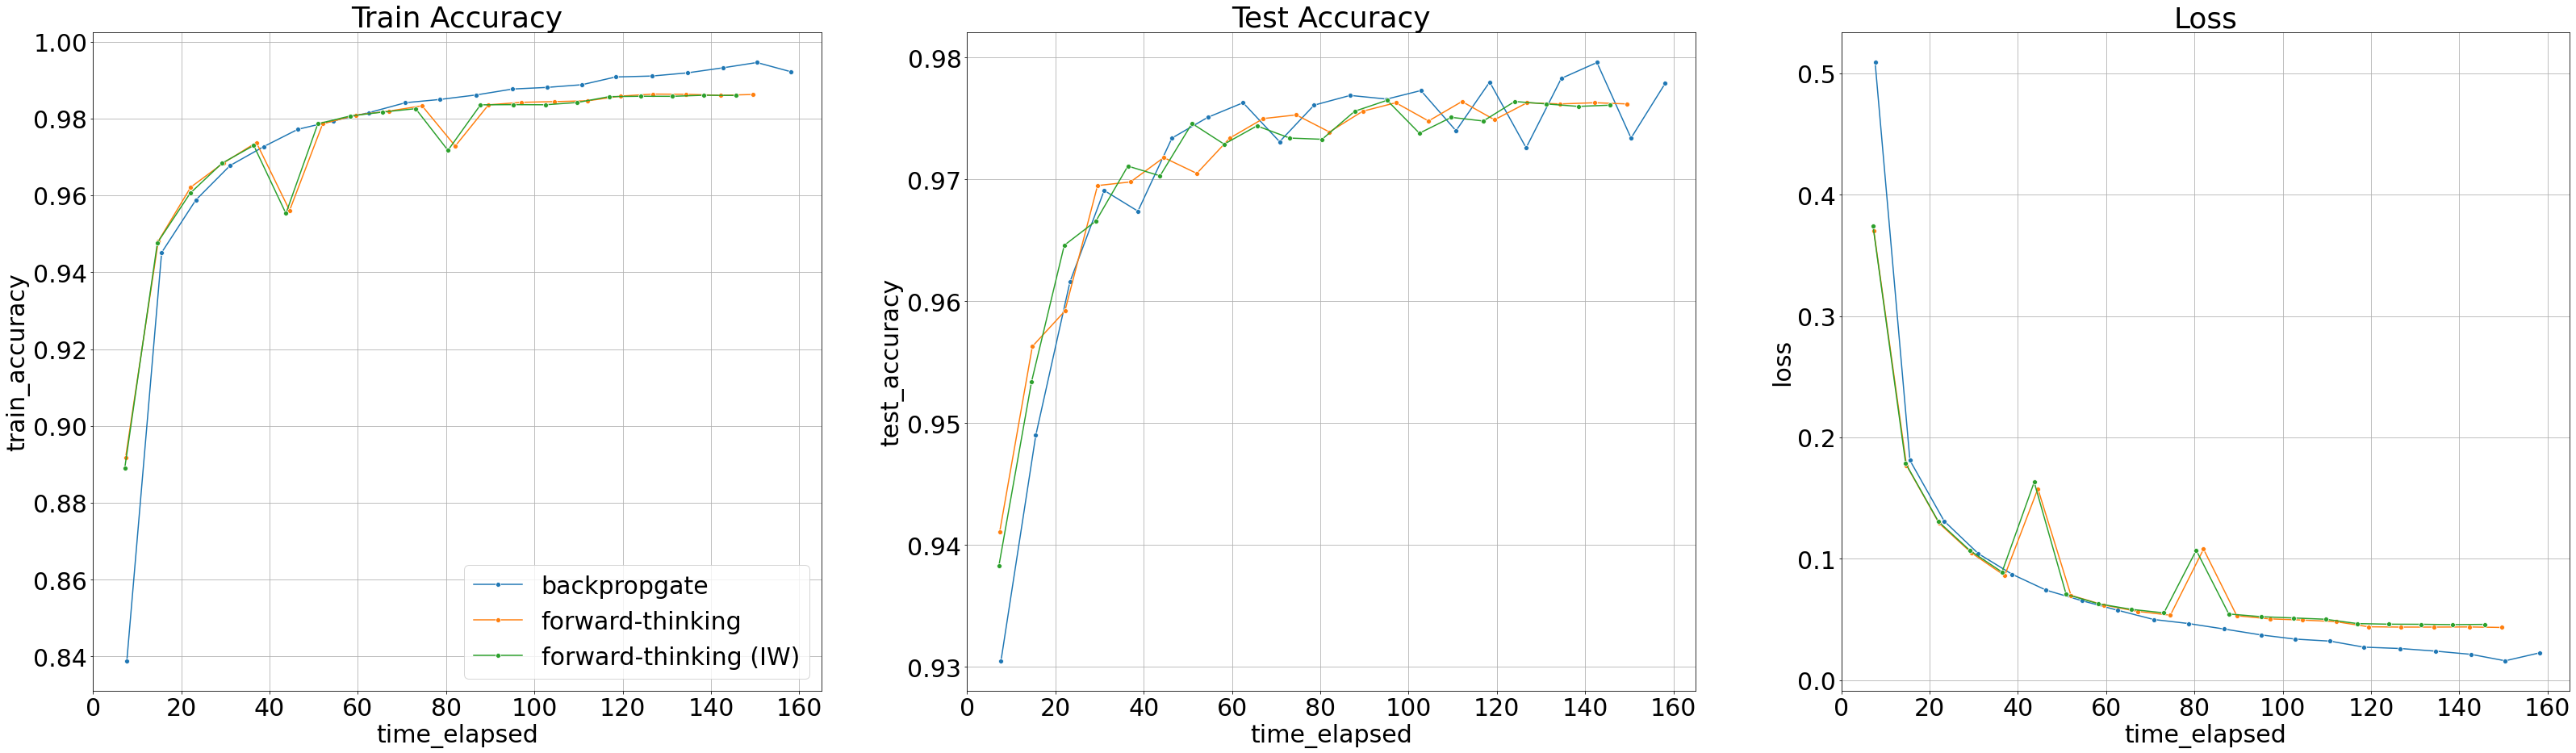

In [121]:
plot(backpropgate_mnist, 
    forward_thinking_mnist, 
    forward_thinking_init_weights_mnist, 
    forward_thinking_batch_norm_init_weights_mnist,
    forward_thinking_batch_norm_freeze_init_weights_mnist,
    ylim=165)

# CIFAR10

This section is comparing the performance using different approachs: Forward thinking and backpropgation. 

In [83]:
backpropgate_cifar10 = pd.read_csv("utils/recorded-accuracy/CIFAR10-backpropgate.csv")
backpropgate_cifar10.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,24.448756,1.620031,0.405970,0.5086
1,1,47.434520,1.098475,0.611193,0.6609
2,2,70.735791,0.836374,0.707381,0.7180
3,3,94.275029,0.694916,0.755215,0.7573
4,4,118.087520,0.593363,0.791760,0.7873


In [84]:
forward_thinking_cifar10 = pd.read_csv("utils/recorded-accuracy/CIFAR10-forward-thinking-pure.csv")
forward_thinking_cifar10.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,8.154174,1.462933,0.490969,0.5597
1,1,16.104433,1.152662,0.608376,0.5673
2,2,24.072740,1.013374,0.653553,0.5897
3,3,31.975761,0.900955,0.693135,0.6000
4,4,39.930578,0.810434,0.724524,0.6022


In [86]:
forward_thinking_init_weights_cifar10 = pd.read_csv("/content/utils/recorded-accuracy/CIFAR10-forward-thinking-weights-init.csv")
forward_thinking_init_weights_cifar10.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,12.080568,1.480174,0.484375,0.5292
1,1,19.198610,1.204895,0.584479,0.5675
2,2,26.261429,1.044074,0.641524,0.6092
3,3,33.334447,0.935098,0.680267,0.6074
4,4,40.383922,0.835734,0.714574,0.6079


In [87]:
forward_thinking_batch_norm_init_weights_cifar10 = pd.read_csv("utils/recorded-accuracy/CIFAR10-forward-thinking-weights-init-BN.csv")
forward_thinking_batch_norm_init_weights_cifar10.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,7.779743,2.840252,0.100284,0.1000
1,1,15.521167,2.303001,0.100404,0.1000
2,2,23.169323,2.303063,0.097027,0.0999
3,3,30.887406,2.303003,0.100144,0.1000
4,4,38.659219,2.303060,0.100084,0.1000


In [88]:
forward_thinking_batch_norm_freeze_init_weights_cifar10 = pd.read_csv("utils/recorded-accuracy/CIFAR10-forward-thinking-weights-init-BN-freeze.csv")
forward_thinking_batch_norm_freeze_init_weights_cifar10.head()

,epoch,time_elapsed,loss,train_accuracy,test_accuracy
0,0,7.896996,2.548296,0.272778,0.3666
1,1,15.587976,1.718915,0.389746,0.4094
2,2,23.366037,1.648089,0.411845,0.4070
3,3,31.197239,1.622413,0.423114,0.4211
4,4,38.926578,1.606004,0.425951,0.4087


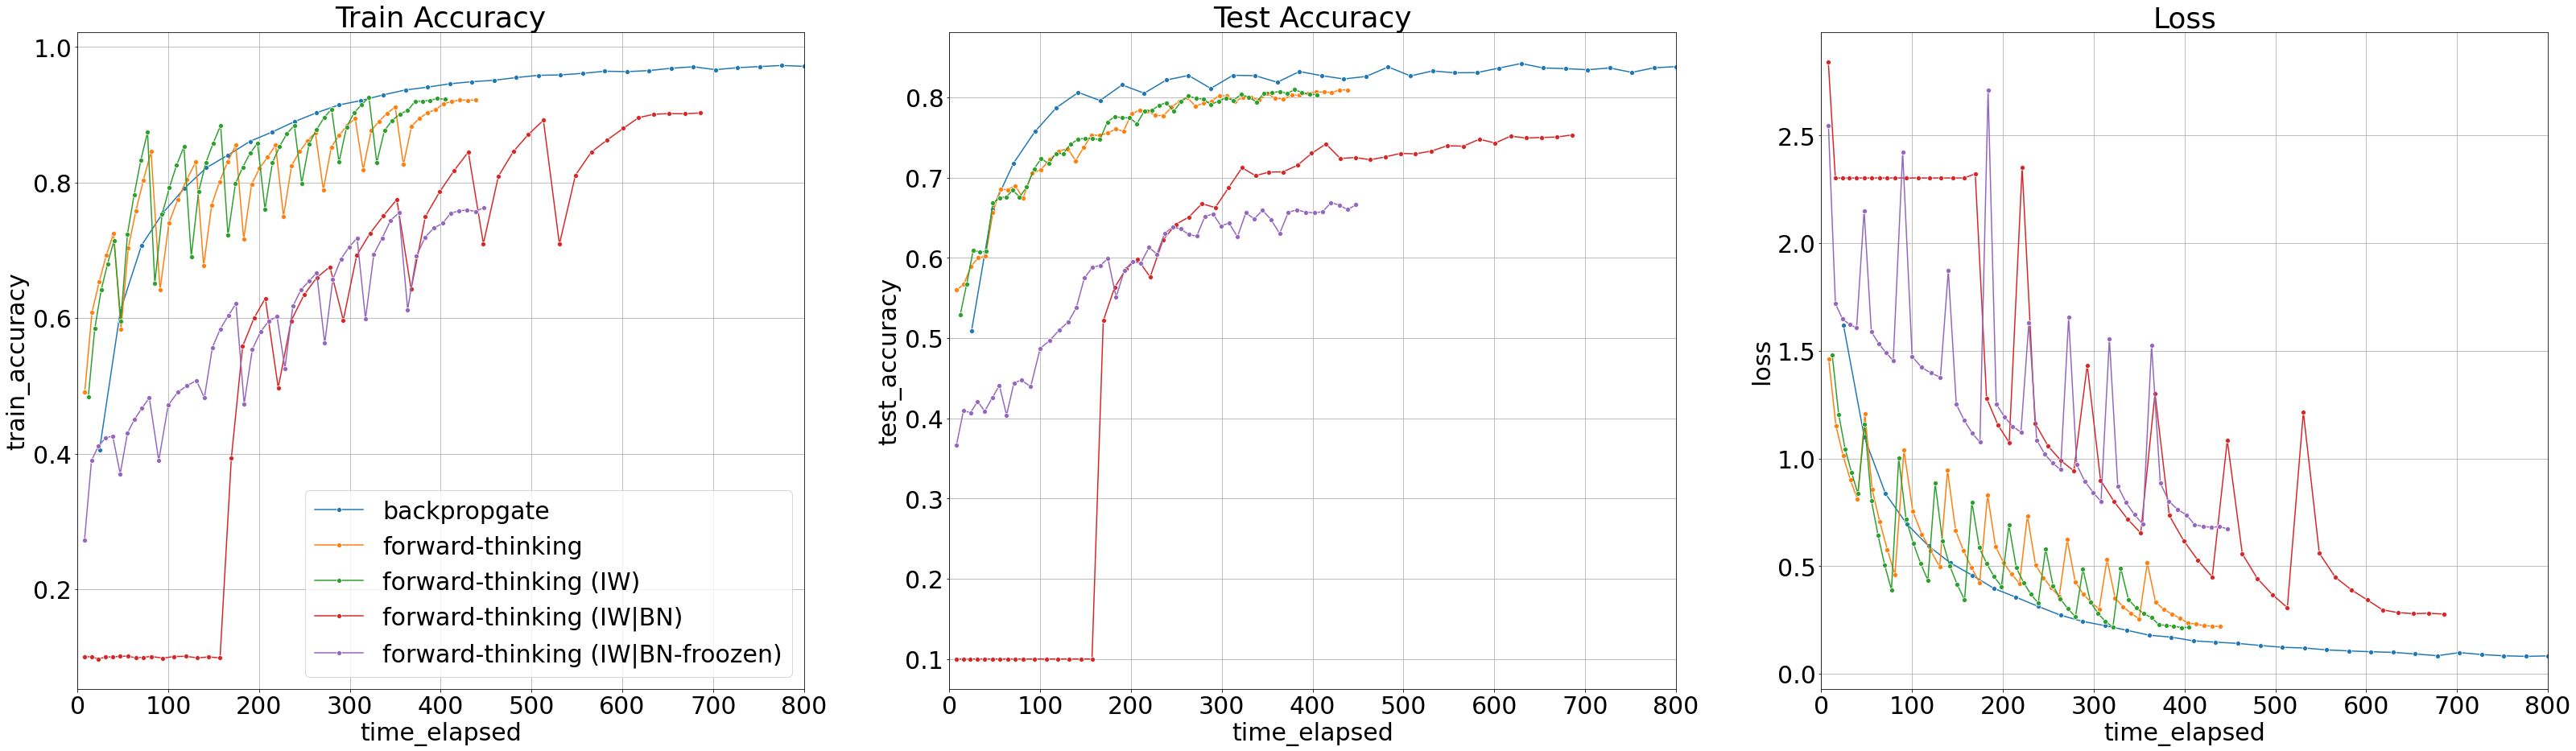

In [122]:
plot(backpropgate_cifar10, 
    forward_thinking_cifar10, 
    forward_thinking_init_weights_cifar10, 
    forward_thinking_batch_norm_init_weights_cifar10,
    forward_thinking_batch_norm_freeze_init_weights_cifar10,
    ylim=800)